<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [4]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

zsh:1: command not found: wget


### Load Data From CSV File


In [142]:
# df = pd.read_csv('loan_train.csv')
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [143]:
df.shape

(346, 10)

### Convert to date time object


In [144]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [145]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [ ]:
# notice: installing seaborn might takes a few minutes
# !pip install seaborn
# !pip install matplotlib

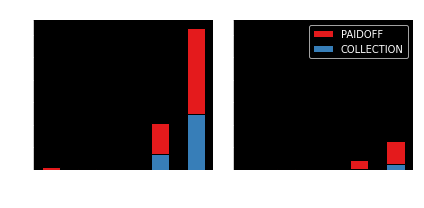

In [146]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

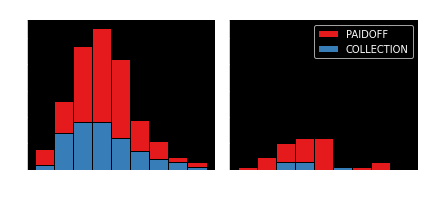

In [147]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


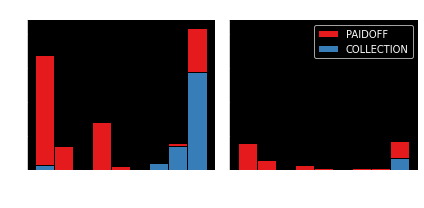

In [148]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [149]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [150]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [156]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
# I converted the labels of loan status to binary.
df['loan_status'].replace(to_replace=['COLLECTION', 'PAIDOFF'], value=[0,1], inplace=True)
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df.head()

KeyError: "['Unnamed: 0.1', 'Unnamed: 0'] not found in axis"

## One Hot Encoding

#### How about education?


In [152]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              1              0.750000
                      0              0.250000
High School or Below  1              0.741722
                      0              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               1              0.765101
                      0              0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [153]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [157]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [159]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [160]:
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [161]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38, -0.88,  1.15]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [227]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [234]:
Ks = 10

def KsNeighborsSearch(ksnum: int, xtrain, ytrain, xtest,ytest):
    mean_acc = np.zeros((ksnum-1))
    std_acc = np.zeros((ksnum-1))

    for n in range(1,ksnum):
        
        #Train Model and Predict  
        neigh = KNeighborsClassifier(n_neighbors = n).fit(xtrain,ytrain)
        yhat=neigh.predict(xtest)
        yhat_proba=neigh.predict_proba(xtest)
        mean_acc[n-1] = metrics.accuracy_score(ytest, yhat)

        
        std_acc[n-1]=np.std(yhat==ytest)/np.sqrt(yhat.shape[0])
    return [ mean_acc, std_acc, yhat,yhat_proba ]

mean_acc, std_acc, *_= KsNeighborsSearch(Ks, X_train, y_train, X_test,y_test)
# std_acc = KsNeighborsSearch(Ks, X_train, y_train, X_test,y_test)['std_acc']
print(mean_acc, std_acc)

[0.64 0.59 0.73 0.7  0.76 0.69 0.8  0.74 0.73] [0.06 0.06 0.05 0.05 0.05 0.06 0.05 0.05 0.05]


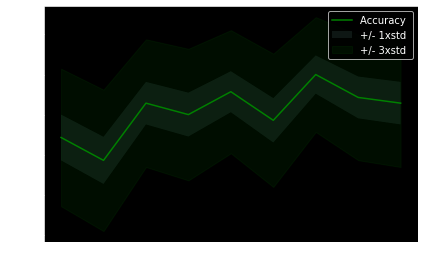

The best accuracy was with 0.8 with k= 7


In [202]:
# Plotting accurancy of the model with different numbers of neighbors.
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

# Decision Tree


In [165]:
X_trainset, X_testset, Y_trainset, y_testset = train_test_split(X,y, test_size=0.3,random_state=3)
print(f'X train set: {X_trainset.shape}, Y Train set: {Y_trainset.shape}')
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# Modeling
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dtree.fit(X_trainset,Y_trainset)
# Prediction
predTree = dtree.predict(X_testset)

X train set: (242, 8), Y Train set: (242,)


In [166]:
#Evaluation
print("Decision tree accuracy: ", metrics.accuracy_score(y_testset,predTree))

Decision tree accuracy:  0.6538461538461539


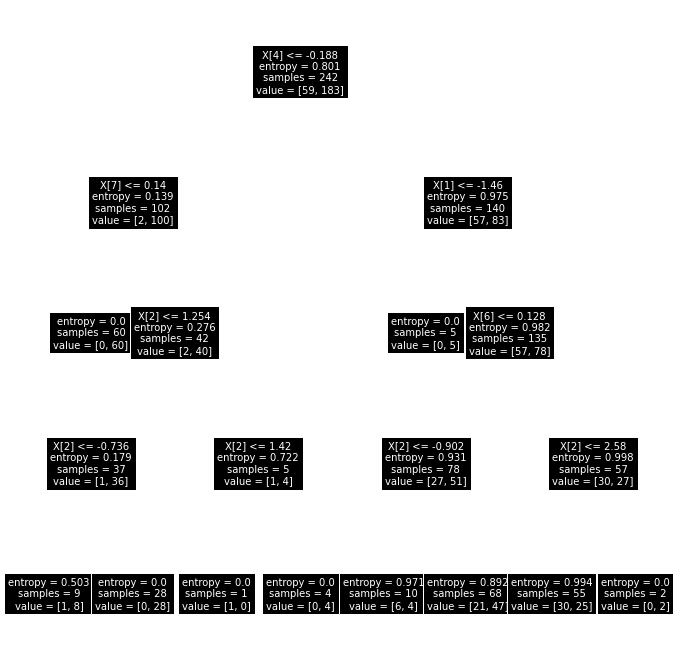

In [167]:
# Visualization
plt.figure(figsize=(12,12))
tree.plot_tree(dtree, fontsize=10)
plt.show()

# Support Vector Machine


## Modeling

In [168]:
# Train,test split
X_train, X_test, y_train, t_test = train_test_split(X,y, test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
# Import
from sklearn import svm
# Modeling
clf = svm.SVC(kernel="rbf")
clf.fit(X_train,y_train)
# Prediction
yhat = clf.predict(X_test)
yhat[0:5]

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


array([0, 1, 1, 1, 1])

## Evaluation

In [100]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [170]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.36      0.27      0.31        15
           1       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70



## Visualization

In [171]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 4 11]
 [ 7 48]]


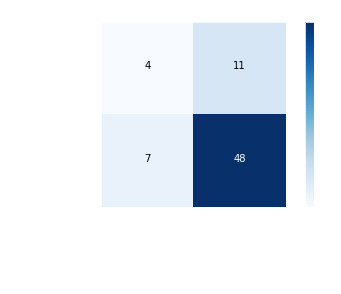

In [172]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION(0','PAIDOFF(1'],normalize= False,  title='Confusion matrix')

# Logistic Regression


In [173]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
yhat_LR = LR.predict(X_test)
yhat_prob_LR = LR.predict_proba(X_test)

## Evaluation

Confusion matrix, without normalization
[[ 2 13]
 [ 9 46]]
              precision    recall  f1-score   support

           0       0.18      0.13      0.15        15
           1       0.78      0.84      0.81        55

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70

Log loss evaluation:  0.5772287609479654


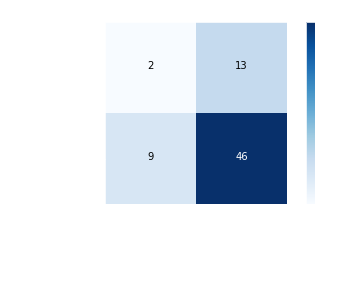

In [174]:
# jaccard_score is weird with LR model
# metrics.jaccard_score(y_test, yhat_LR, pos_label='PAIDOFF')
# Confusion matrix
cnf_matrix_LR = confusion_matrix(y_test, yhat_LR, labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_LR, classes=['COLLECTION(0)','PAIDOFF(1)'],normalize= False,  title='Confusion matrix')

# Classification report
print(classification_report(y_test, yhat_LR))

# Log loss
print('Log loss evaluation: ', metrics.log_loss(y_test, yhat_prob_LR)
)

# Model Evaluation using Test set


In [191]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation


In [248]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [249]:
test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(df['effective_date'])
test_df = test_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
test_df['dayoftheweek'] = df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayoftheweek'].apply(lambda x: 1 if (x>3) else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1], inplace=True)
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayoftheweek,weekend
0,1,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,1,300,7,2016-09-08,2016-10-07,35,Master or Above,0,3,0
2,1,1000,30,2016-09-08,2016-09-22,43,High School or Below,1,3,0
3,1,1000,30,2016-09-09,2016-10-08,26,college,0,4,1
4,1,800,15,2016-09-09,2016-10-08,29,Bechalor,0,4,1


In [250]:
test_Feature = test_df[['Principal', 'terms', 'age', 'Gender', 'weekend']]
test_Feature = pd.concat([test_Feature, pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis=1, inplace=True)
test_Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,0,0,0,0
2,1000,30,43,1,0,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [257]:
X2 = test_Feature
y2 = test_df['loan_status'].values
# normalize data
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
X[:5]

array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38, -0.88,  1.15]])

### Train test split

In [258]:
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y2, test_size=0.2, random_state=4)
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)


Train set: (43, 8) (43,)
Test set: (11, 8) (11,)


## K Nearest Neighbor(KNN)

### Model fitting and prediction

In [270]:
#model fit  and Predict
Ks2 = 6
mean_acc, std_acc, yhat, yhat_proba = KsNeighborsSearch(Ks2, X2_train, y2_train,X2_test, y2_test)


### Visualization

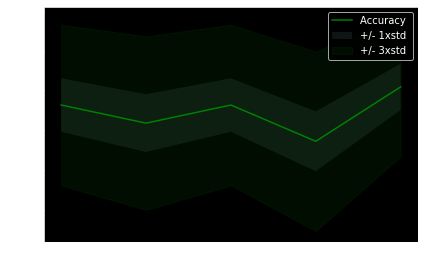

The best accuracy was with 0.8181818181818182 with k= 5


In [271]:
plt.plot(range(1,Ks2),mean_acc,'g')
plt.fill_between(range(1,Ks2),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks2),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

### Evaluation

In [274]:
knn_jaccard = metrics.jaccard_score(y2_test, yhat, average='weighted')
knn_f1score = metrics.f1_score(y2_test, yhat, average='weighted')
# knn_logloss = metrics.log_loss(y2_test, yhat_proba)

## Decision Tree

### Model fitting and prediction

In [269]:
# Modeling
dtree2 = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dtree2.fit(X2_train, y2_train)
# Prediction
predTree2 = dtree.predict(X2_test)
#Evaluation
print("Decision tree accuracy: ", metrics.accuracy_score(y2_test ,predTree2))

Decision tree accuracy:  0.7272727272727273


### Visualization

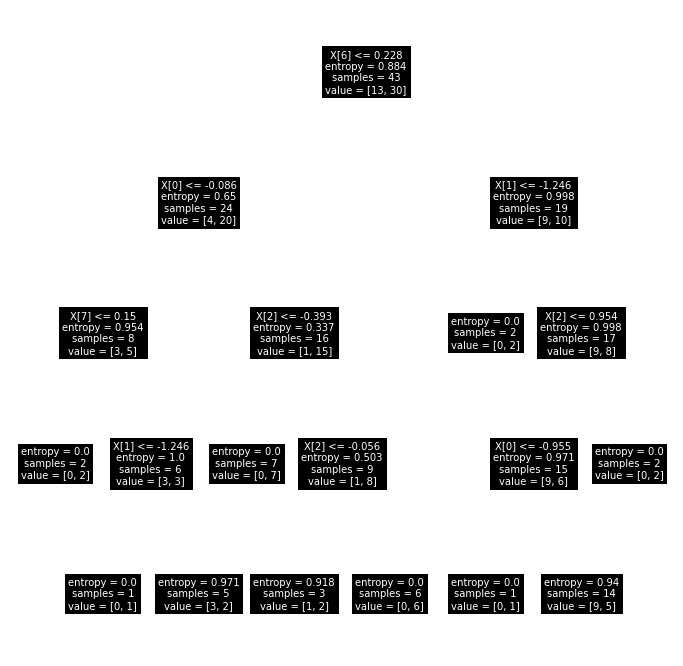

In [273]:
# Visualization
plt.figure(figsize=(12,12))
tree.plot_tree(dtree2, fontsize=10)
plt.show()

### Evaluation

In [277]:
dtree_jaccard = metrics.jaccard_score(y2_test, predTree2, average='weighted')
dtree_f1score = metrics.f1_score(y2_test, predTree2, average='weighted')

## Support Vector MAchine

### Model fitting and prediction

In [284]:
# Modeling
clf2 = svm.SVC(kernel="rbf")
clf2.fit(X2_train,y2_train)
# Prediction
svm_yhat = clf2.predict(X2_test)
svm_yhat[0:5]

array([1, 1, 1, 1, 1])

### Evaluation

In [285]:
# Compute confusion matrix
cnf_matrix2 = confusion_matrix(y2_test, svm_yhat, labels=[0,1])
np.set_printoptions(precision=2)

print(classification_report(y2_test, svm_yhat))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.91      1.00      0.95        10

    accuracy                           0.91        11
   macro avg       0.45      0.50      0.48        11
weighted avg       0.83      0.91      0.87        11



In [286]:
svm_jaccard = metrics.jaccard_score(y2_test, svm_yhat, average='weighted')
svm_f1score = metrics.f1_score(y2_test, svm_yhat, average='weighted')

### Visualization

Confusion matrix, without normalization
[[ 0  1]
 [ 0 10]]


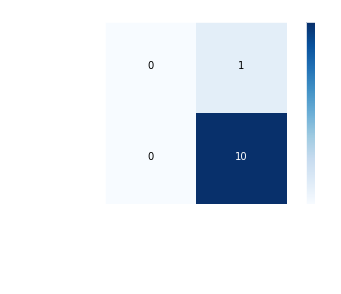

In [287]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix2, classes=['COLLECTION(0)','PAIDOFF(1)'],normalize= False,  title='Confusion matrix')

## Logistic Regression

### Model fitting and prediction

In [289]:
LR2 = LogisticRegression(C=0.01, solver='liblinear').fit(X2_train, y2_train)
yhat_LR2 = LR2.predict(X2_test)
yhat_prob_LR2 = LR2.predict_proba(X2_test)

### Evaluation

In [292]:
# Confusion matrix
cnf_matrix_LR2 = confusion_matrix(y2_test, yhat_LR2, labels=[0,1])
np.set_printoptions(precision=2)


# Classification report
print(classification_report(y2_test, yhat_LR2))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.90      0.95        10

    accuracy                           0.91        11
   macro avg       0.75      0.95      0.81        11
weighted avg       0.95      0.91      0.92        11



In [294]:
lr_jaccard = metrics.jaccard_score(y2_test, yhat_LR2, average='weighted')
lr_f1score = metrics.f1_score(y2_test, yhat_LR2, average='weighted')
lr_logloss = metrics.log_loss(y2_test, yhat_prob_LR2)

### Visualization

Confusion matrix, without normalization
[[1 0]
 [1 9]]


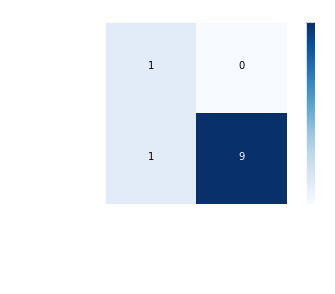

In [291]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_LR2, classes=['COLLECTION(0)','PAIDOFF(1)'],normalize= False,  title='Confusion matrix')

# Report

In [295]:
report_cols = ['Algorithm', 'Jaccard', 'F1-score', 'LogLoss']
report_data = [['KNN', knn_jaccard, knn_f1score, 'NA'], [
    'Decision Tree', dtree_jaccard, dtree_f1score, 'NA'], ['SVM', svm_jaccard, svm_f1score, 'NA'], ['LogisticRegression', lr_jaccard, lr_f1score, lr_logloss]]
report_df = pd.DataFrame(report_data, columns=report_cols)
report_df


,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.743802,0.818182,NA
1,Decision Tree,0.659091,0.785027,NA
2,SVM,0.826446,0.865801,NA
3,LogisticRegression,0.863636,0.921850,0.655733


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
